<a href="https://colab.research.google.com/github/marziye-jalili/image_processing/blob/main/number_of_cells_in_the_microscope_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from tensorflow import keras
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt

# Original Image

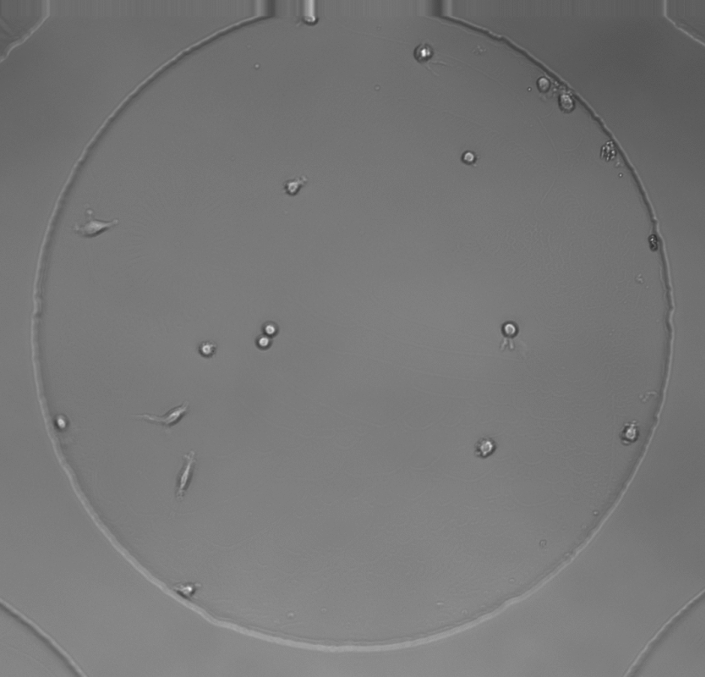

Original Image


In [2]:
image_path = '/content/hucre.png'

img = cv2.imread(image_path, 0)
img = cv2.resize(img, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
print('Original Image')

# Sharpened Image

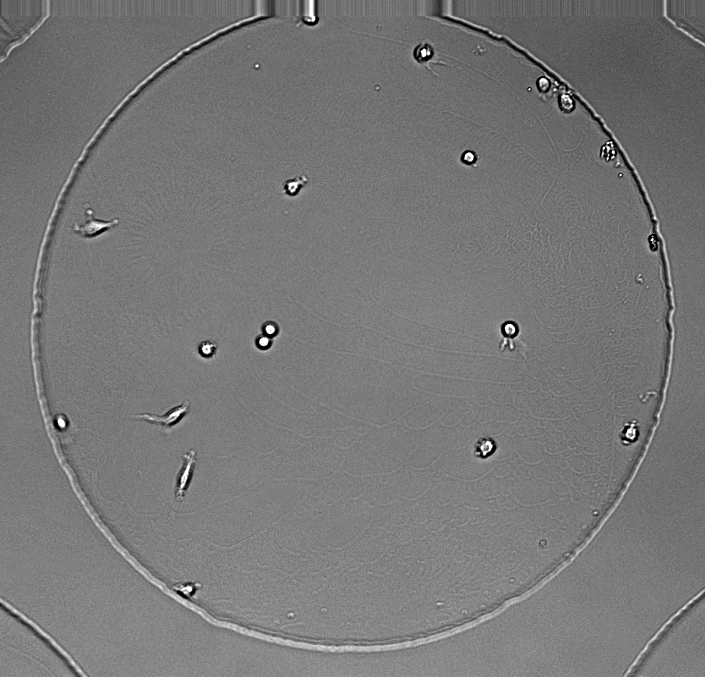

Sharpened Image


In [3]:
sharpened_img = cv2.GaussianBlur(img, (0, 0), 3)
sharpened_img = cv2.addWeighted(img, 5, sharpened_img, -4, 0)

cv2_imshow(sharpened_img)
print('Sharpened Image')

# binary Image

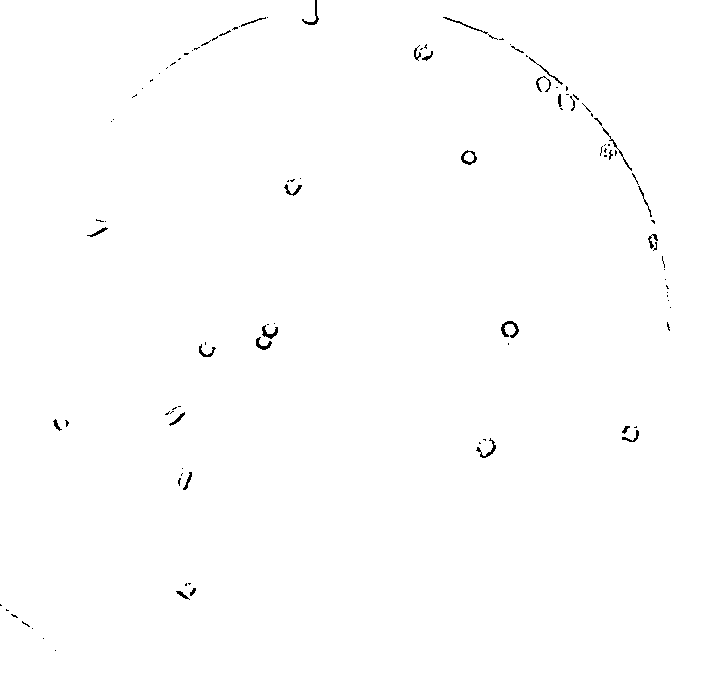

In [4]:
binary_mask = cv2.cvtColor(sharpened_img, cv2.COLOR_GRAY2BGR)
_, binary_mask = cv2.threshold(binary_mask, 1, 255, cv2.THRESH_BINARY)

binary_img1 = cv2.adaptiveThreshold(sharpened_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 53, 80)

cv2_imshow(binary_img1)

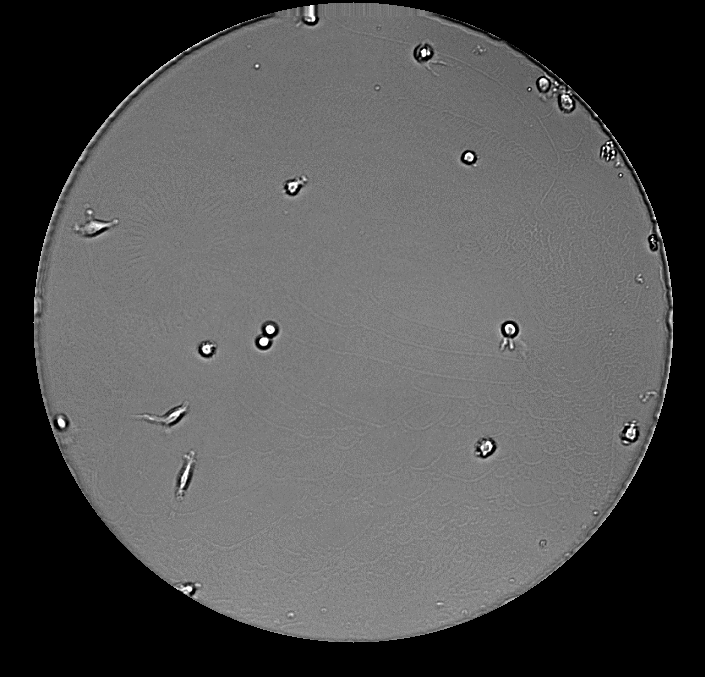

In [5]:
circle_center = (353, 322)
circle_radius = 320

mask = np.zeros_like(sharpened_img, dtype=np.uint8)
cv2.circle(mask, circle_center, circle_radius, (255, 255, 255), thickness=cv2.FILLED)
result_img = cv2.bitwise_and(sharpened_img, mask)

cv2_imshow(result_img)

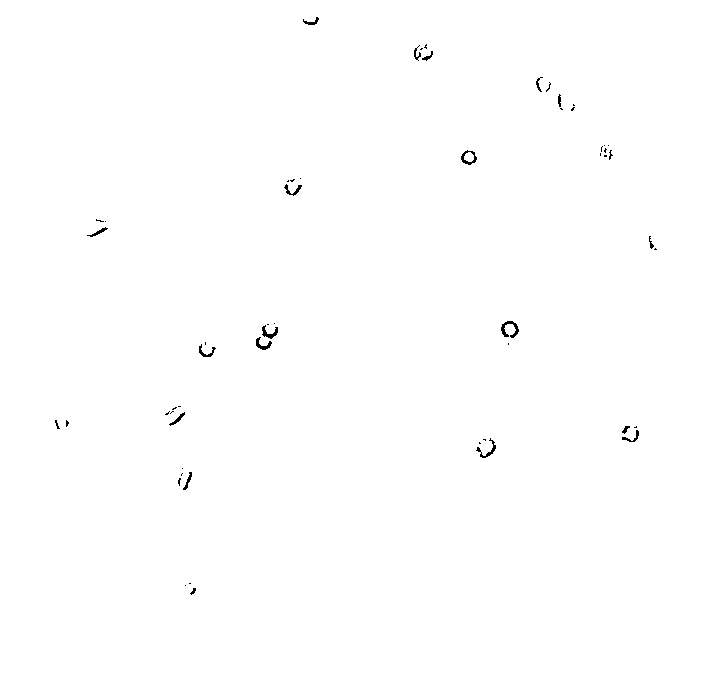

In [6]:
binary_mask = cv2.cvtColor(result_img, cv2.COLOR_GRAY2BGR)
_, binary_mask = cv2.threshold(binary_mask, 50, 255, cv2.THRESH_BINARY)

binary_img2 = cv2.adaptiveThreshold(result_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 53, 80)

cv2_imshow(binary_img2)

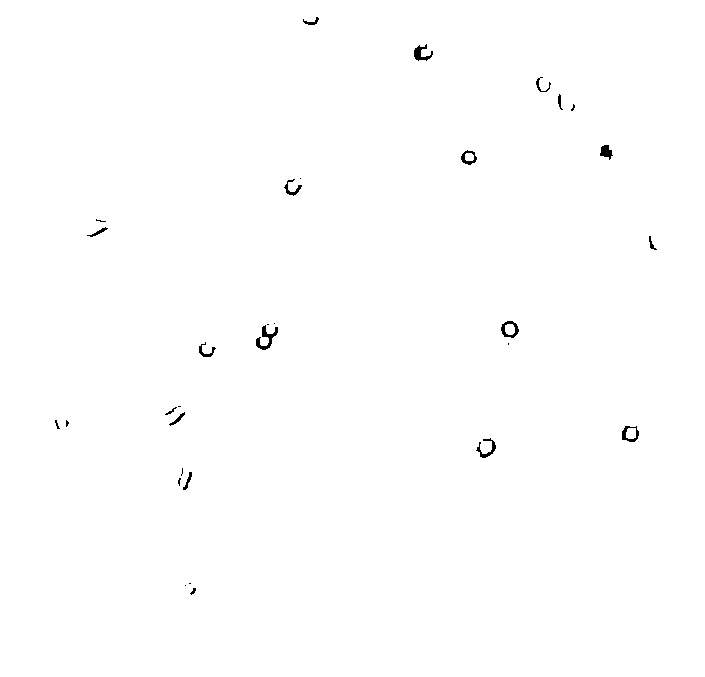

In [7]:
kernel = np.ones((5,5), np.uint8)
binary_morphology = cv2.morphologyEx(binary_img2, cv2.MORPH_OPEN, kernel)

cv2_imshow(binary_morphology)

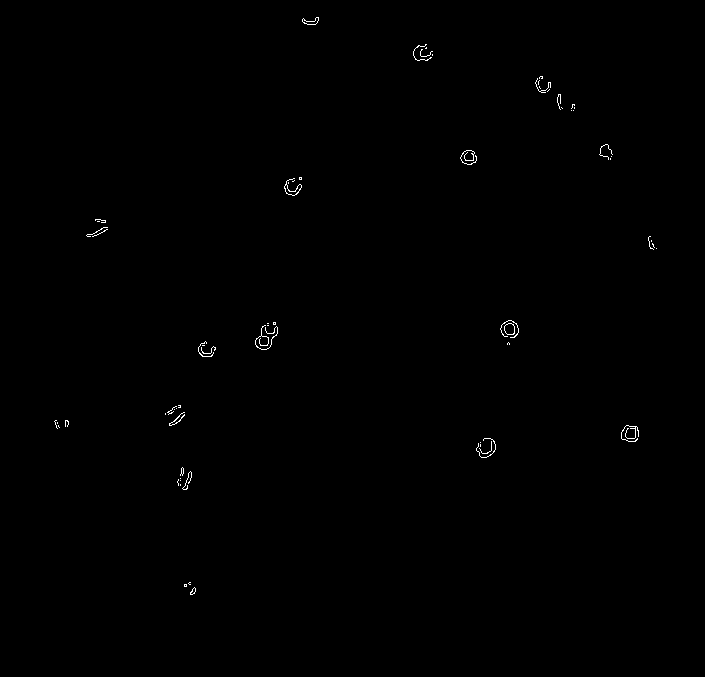

In [8]:
# Apply Canny edge detection
edges = cv2.Canny(binary_morphology, 50, 150)

cv2_imshow(edges)


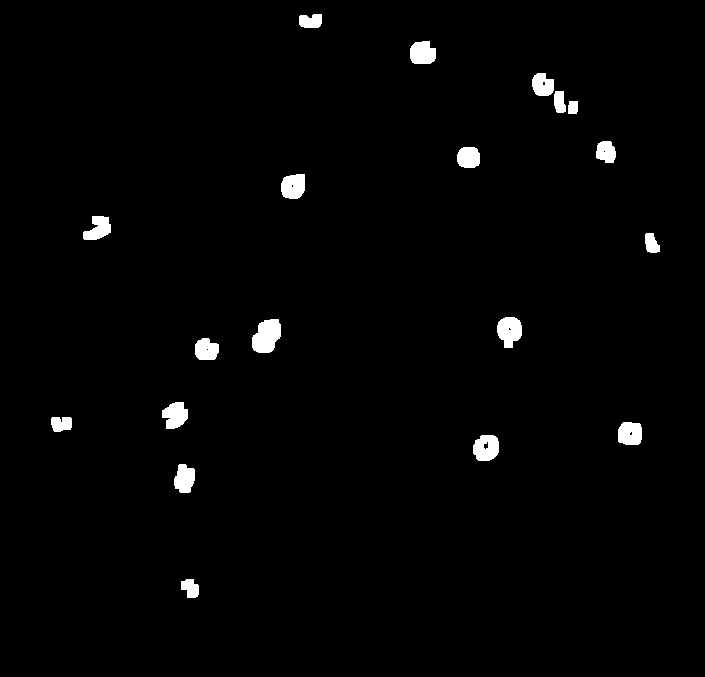

In [9]:
# Define the dilation kernel
dilation_kernel = np.ones((7, 7), np.uint8)
dilated_edges = cv2.dilate(edges, dilation_kernel, iterations=1)

cv2_imshow(dilated_edges)


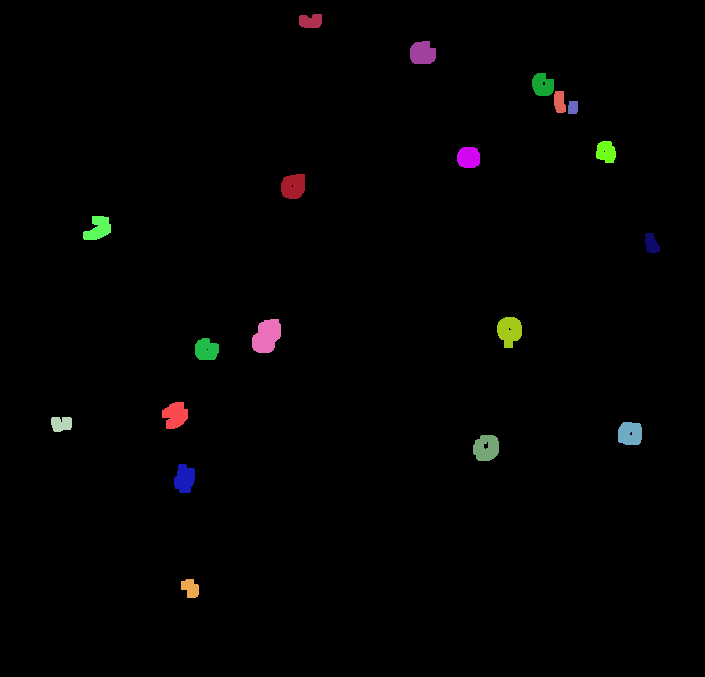

In [10]:
# Connected component labeling on the dilated edges
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_edges, connectivity=8)

# Create a copy of the dilated edges to apply color
colored_dilated_edges = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)

# Assign unique colors to each connected component (cell)
for label in range(1, num_labels):
    mask = (labels == label).astype(np.uint8)
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)  # Generate a random color
    colored_dilated_edges[mask > 0] = color

# Display the result
cv2_imshow(colored_dilated_edges)


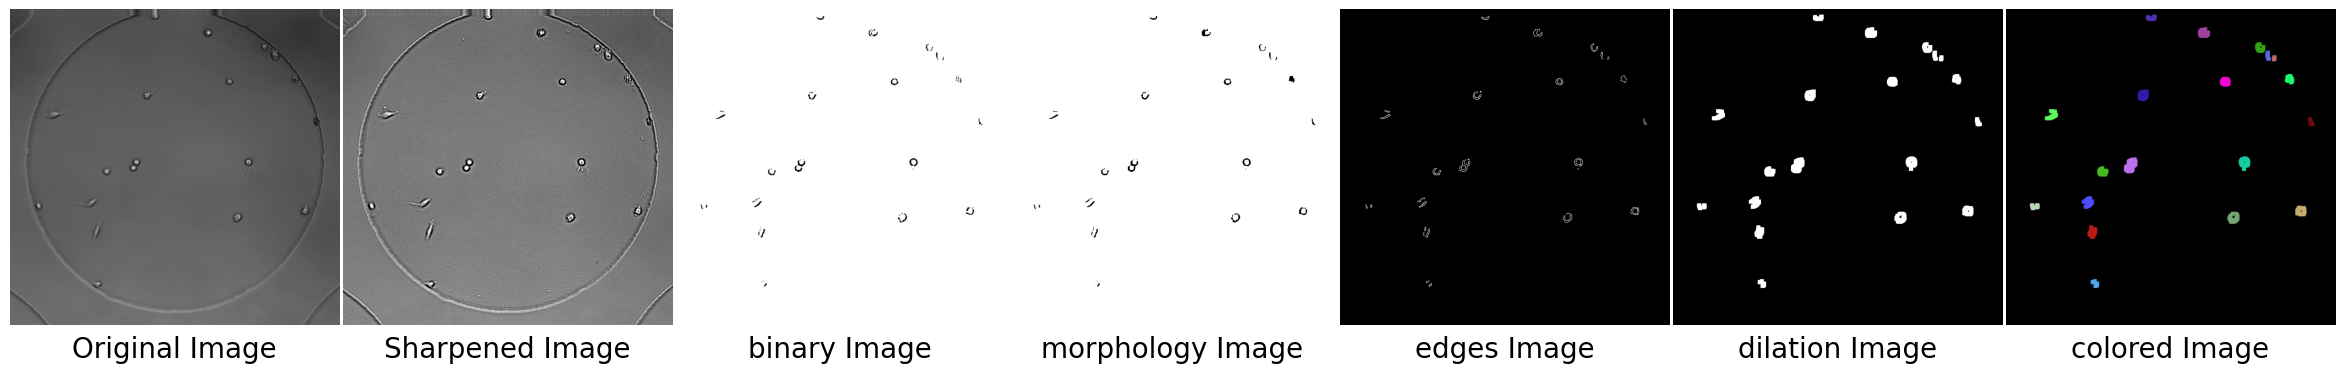

In [11]:
img_large = cv2.resize(img, None, fx=3.5, fy=3.5, interpolation=cv2.INTER_CUBIC)
sharpened_img_large = cv2.resize(sharpened_img, None, fx=3.5, fy=3.5, interpolation=cv2.INTER_CUBIC)
binary_img_large = cv2.resize(binary_img2, None, fx=3.5, fy=3.5, interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(30, 5))

for ax in axs:
    ax.axis("off")
    ax.title.set_text('')

axs[0].imshow(img_large, cmap='gray')
axs[1].imshow(sharpened_img_large, cmap='gray')
axs[2].imshow(binary_img_large, cmap='gray')
axs[3].imshow(binary_morphology, cmap='gray')
axs[4].imshow(edges, cmap='gray')
axs[5].imshow(dilated_edges, cmap='gray')
axs[6].imshow(colored_dilated_edges, cmap='gray')

axs[0].text(0.5, -0.1, 'Original Image', transform=axs[0].transAxes, fontsize=20, ha='center')
axs[1].text(0.5, -0.1, 'Sharpened Image', transform=axs[1].transAxes, fontsize=20, ha='center')
axs[2].text(0.5, -0.1, 'binary Image', transform=axs[2].transAxes, fontsize=20, ha='center')
axs[3].text(0.5, -0.1, 'morphology Image', transform=axs[3].transAxes, fontsize=20, ha='center')
axs[4].text(0.5, -0.1, 'edges Image', transform=axs[4].transAxes, fontsize=20, ha='center')
axs[5].text(0.5, -0.1, 'dilation Image', transform=axs[5].transAxes, fontsize=20, ha='center')
axs[6].text(0.5, -0.1, 'colored Image', transform=axs[6].transAxes, fontsize=20, ha='center')


plt.subplots_adjust(wspace=0.01)

plt.show()

Label 1: Area=280, Orientation=-1.7115828849206207, Circularity=0.7396740140119927
Label 2: Area=505, Orientation=-1.3194597782900186, Circularity=0.8620588125520218
Label 3: Area=402, Orientation=-0.8977790508605302, Circularity=0.8346184951019985
Label 4: Area=220, Orientation=-0.8186950335323259, Circularity=0.770524098982527
Label 5: Area=124, Orientation=-0.7747452627569908, Circularity=0.9347731970147064
Label 6: Area=352, Orientation=-0.5936090792996394, Circularity=0.8442247069137804
Label 7: Area=421, Orientation=-0.9610550272335984, Circularity=0.9499377446220967
Label 8: Area=513, Orientation=-1.9863448451790235, Circularity=0.9001296388099429
Label 9: Area=448, Orientation=-2.7893444574040926, Circularity=0.5533034059570492
Label 10: Area=227, Orientation=-0.25852112589614, Circularity=0.7886386064147005
Label 11: Area=579, Orientation=0.054129412920062486, Circularity=0.7944714794728118
Label 12: Area=749, Orientation=2.983900066116659, Circularity=0.7991288227549866
Label

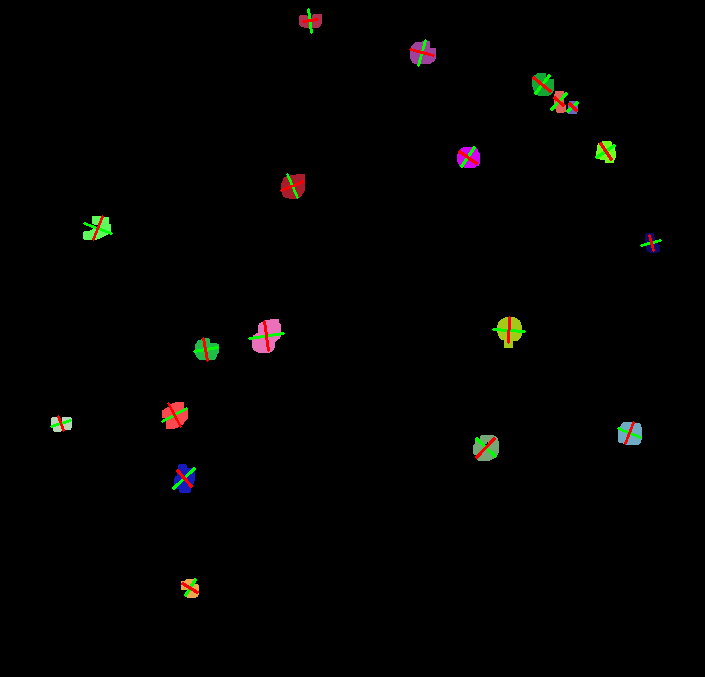

In [12]:
# Area, orientation, and circularity calculations for each connected component
for label in range(1, num_labels):
    # Extract relevant statistics for the current connected component
    area = stats[label, cv2.CC_STAT_AREA]
    centroid_x, centroid_y = centroids[label]

    # Calculate the orientation using the centroid of the connected component
    orientation = np.arctan2(centroid_y - circle_center[1], centroid_x - circle_center[0])

    # Calculate the circularity using the formula: circularity = (4 * pi * area) / perimeter^2
    mask = (labels == label).astype(np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = cv2.arcLength(contours[0], closed=True)
    circularity = (4 * np.pi * area) / (perimeter ** 2)

    # Print the calculated values for each connected component
    print(f"Label {label}: Area={area}, Orientation={orientation}, Circularity={circularity}")

    # Draw the major axis of the connected component on the original image
    major_axis_length = max(stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT])
    minor_axis_length = min(stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT])

    # Draw the major axis
    angle_rad = orientation
    x1 = int(centroid_x - 0.5 * major_axis_length * np.cos(angle_rad))
    y1 = int(centroid_y - 0.5 * major_axis_length * np.sin(angle_rad))
    x2 = int(centroid_x + 0.5 * major_axis_length * np.cos(angle_rad))
    y2 = int(centroid_y + 0.5 * major_axis_length * np.sin(angle_rad))
    cv2.line(colored_dilated_edges, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw the minor axis
    angle_rad += np.pi / 2  # Rotate by 90 degrees for minor axis
    x1 = int(centroid_x - 0.5 * minor_axis_length * np.cos(angle_rad))
    y1 = int(centroid_y - 0.5 * minor_axis_length * np.sin(angle_rad))
    x2 = int(centroid_x + 0.5 * minor_axis_length * np.cos(angle_rad))
    y2 = int(centroid_y + 0.5 * minor_axis_length * np.sin(angle_rad))
    cv2.line(colored_dilated_edges, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2_imshow(colored_dilated_edges)


Label 1: Area=280, Orientation=-1.7115828849206207, Circularity=0.7396740140119927
Label 2: Area=505, Orientation=-1.3194597782900186, Circularity=0.8620588125520218
Label 3: Area=402, Orientation=-0.8977790508605302, Circularity=0.8346184951019985
Label 4: Area=220, Orientation=-0.8186950335323259, Circularity=0.770524098982527
Label 5: Area=124, Orientation=-0.7747452627569908, Circularity=0.9347731970147064
Label 6: Area=352, Orientation=-0.5936090792996394, Circularity=0.8442247069137804
Label 7: Area=421, Orientation=-0.9610550272335984, Circularity=0.9499377446220967
Label 8: Area=513, Orientation=-1.9863448451790235, Circularity=0.9001296388099429
Label 9: Area=448, Orientation=-2.7893444574040926, Circularity=0.5533034059570492
Label 10: Area=227, Orientation=-0.25852112589614, Circularity=0.7886386064147005
Label 11: Area=579, Orientation=0.054129412920062486, Circularity=0.7944714794728118
Label 12: Area=749, Orientation=2.983900066116659, Circularity=0.7991288227549866
Label

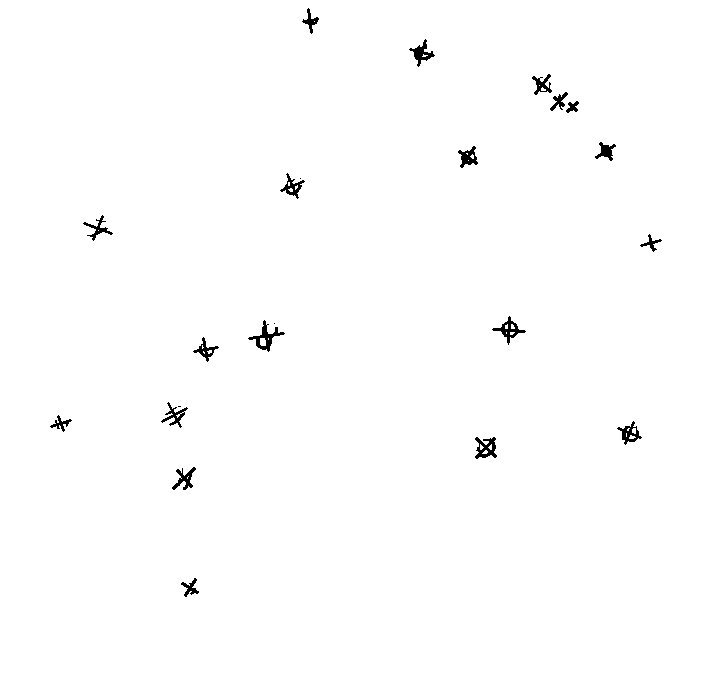

In [13]:
# Area, orientation, and circularity calculations for each connected component
for label in range(1, num_labels):
    # Extract relevant statistics for the current connected component
    area = stats[label, cv2.CC_STAT_AREA]
    centroid_x, centroid_y = centroids[label]

    # Calculate the orientation using the centroid of the connected component
    orientation = np.arctan2(centroid_y - circle_center[1], centroid_x - circle_center[0])

    # Calculate the circularity using the formula: circularity = (4 * pi * area) / perimeter^2
    mask = (labels == label).astype(np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = cv2.arcLength(contours[0], closed=True)
    circularity = (4 * np.pi * area) / (perimeter ** 2)

    # Print the calculated values for each connected component
    print(f"Label {label}: Area={area}, Orientation={orientation}, Circularity={circularity}")

    # Draw the major axis of the connected component on the original image
    major_axis_length = max(stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT])
    minor_axis_length = min(stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT])

    # Draw the major axis
    angle_rad = orientation
    x1 = int(centroid_x - 0.5 * major_axis_length * np.cos(angle_rad))
    y1 = int(centroid_y - 0.5 * major_axis_length * np.sin(angle_rad))
    x2 = int(centroid_x + 0.5 * major_axis_length * np.cos(angle_rad))
    y2 = int(centroid_y + 0.5 * major_axis_length * np.sin(angle_rad))
    cv2.line(binary_morphology, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw the minor axis
    angle_rad += np.pi / 2  # Rotate by 90 degrees for minor axis
    x1 = int(centroid_x - 0.5 * minor_axis_length * np.cos(angle_rad))
    y1 = int(centroid_y - 0.5 * minor_axis_length * np.sin(angle_rad))
    x2 = int(centroid_x + 0.5 * minor_axis_length * np.cos(angle_rad))
    y2 = int(centroid_y + 0.5 * minor_axis_length * np.sin(angle_rad))
    cv2.line(binary_morphology, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2_imshow(binary_morphology)
